In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建SVM模型
svm = SVC(kernel='linear', random_state=42)

# 训练模型
svm.fit(X_train, y_train)

# 预测
y_pred = svm.predict(X_test)

# 使用 Accuracy、Recall、F1 Score、Confusion Matrix 这四个评估指标来评估实验效果
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Confusion Matrix: {matrix}")



Accuracy: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [20]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# 导入数据集
newsgroups = fetch_20newsgroups()

# 查看类别标签、数据集的描述、数据样本
print("类别标签：", newsgroups.target_names)
print("数据集描述：", newsgroups.DESCR)

# 将文本数据转换为词袋模型
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

# 将数据集分为训练集和测试集，训练集比例 0.2，随机种子 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练朴素贝叶斯分类器
clf = MultinomialNB()
clf.fit(X_train, y_train)

# 进行预测
y_pred = clf.predict(X_test)

# 使用 Accuracy、Recall、F1 Score 这三个评估指标来评估实验效果
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)

# 画出混淆矩阵 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(newsgroups.target_names))
plt.xticks(tick_marks, newsgroups.target_names, rotation=45)
plt.yticks(tick_marks, newsgroups.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

HTTPError: HTTP Error 403: Forbidden

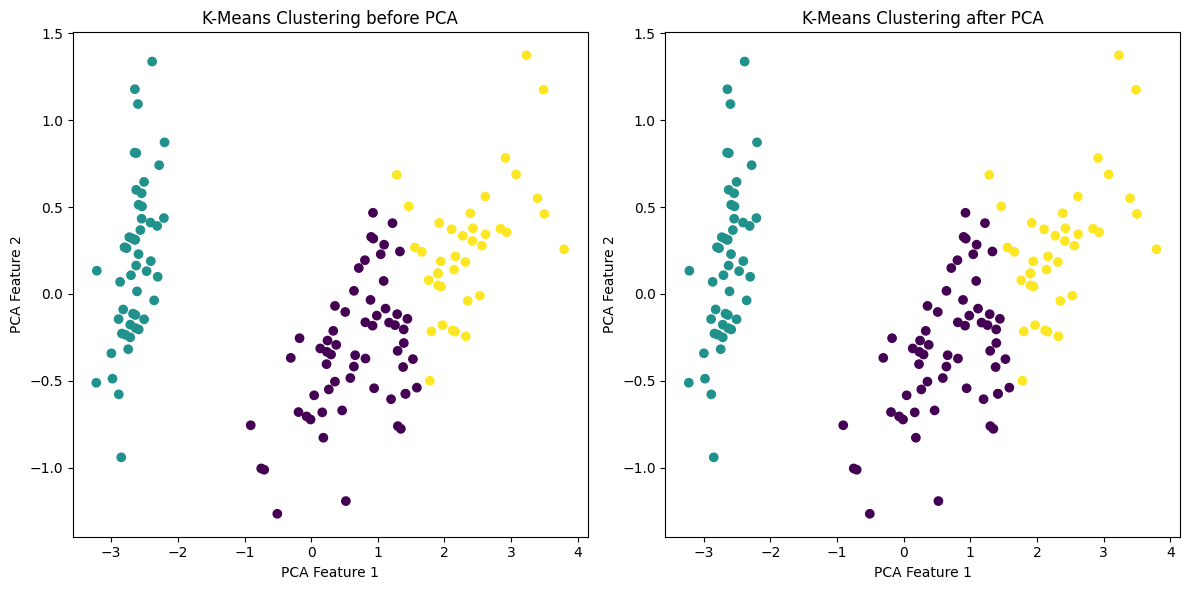

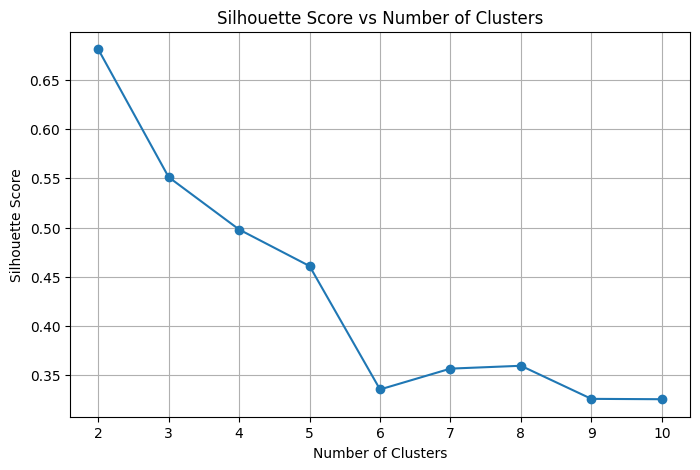

In [12]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 加载数据集
iris = datasets.load_iris()
X = iris.data

# K-Means聚类
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X)

# PCA降维到2维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 可视化结果
plt.figure(figsize=(12, 6))

# 原始数据聚类可视化
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('K-Means Clustering before PCA')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')

# 先降维再聚类可视化
X_pca_clusters = kmeans.fit_predict(X_pca)
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_pca_clusters, cmap='viridis', marker='o')
plt.title('K-Means Clustering after PCA')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')

plt.tight_layout()
plt.show()

# 计算轮廓系数
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    clusters = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, clusters))

# 绘制轮廓系数与聚类数的关系图
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

